# Build a model that predicts the rating of a movie based on  features like genre, director, and actors. </br> You can use regression techniques to tackle this problem.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import klib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import data
#dataset = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
dataset = pd.read_csv("IMDb Movies India.csv", encoding='Windows-1252')
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# display columns
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [4]:
# display data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# display descriptive statistics of numeric data columns
dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# display descriptive statistics of all data columns
dataset.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [7]:
# display type columns
dataset.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
# number of null values ​​per column
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

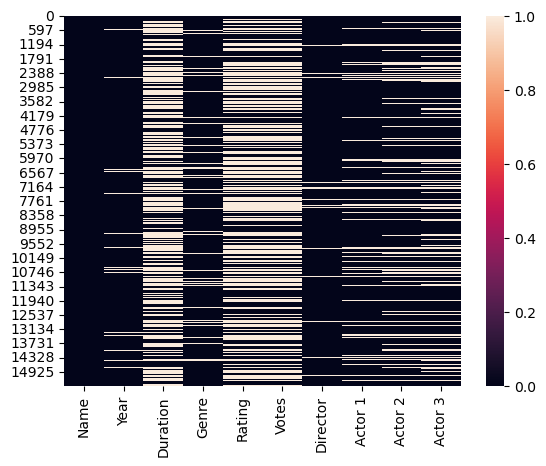

In [9]:
# schema consult the number of null values ​​per column
sns.heatmap(dataset.isnull())

In [10]:
print("Nembre de valeurs null before :", sum(dataset.isnull().sum()))
dataset = dataset.fillna(dataset.bfill())
print("Nembre de valeurs null after :", sum(dataset.isnull().sum()))

Nembre de valeurs null before : 33523
Nembre de valeurs null after : 0


In [11]:
# number of null values ​​per column
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

<Axes: >

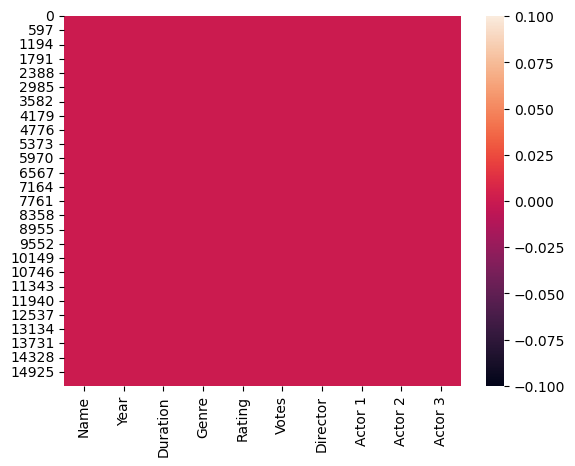

In [12]:
sns.heatmap(dataset.isnull())

In [13]:
# duplicate columns
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Length: 15509, dtype: bool

In [14]:
dataset.duplicated().sum()

9

In [15]:
dataset.drop_duplicates(inplace= True)

In [16]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Length: 15500, dtype: bool

In [17]:
dataset.duplicated().sum()

0

In [18]:
# Clean up the genre by separating it 
dataset['Genre'] = dataset['Genre'].str.split(', ')

In [19]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,(2019),109 min,[Drama],7.0,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,[Drama],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"[Drama, Musical]",4.4,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"[Comedy, Romance]",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,[Drama],4.7,827,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<Axes: >

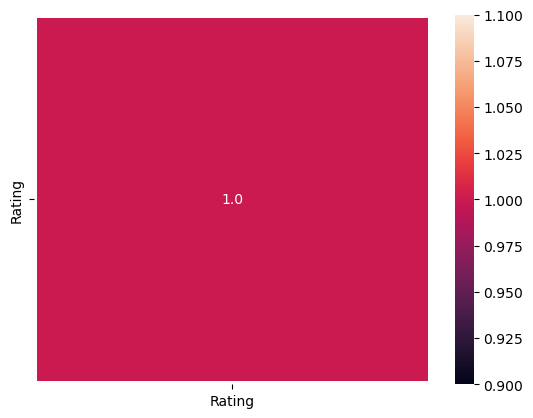

In [20]:
num_cols = dataset.select_dtypes(include='number').columns

corr_matrix = dataset[num_cols].corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [21]:
#Handle outliers
numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

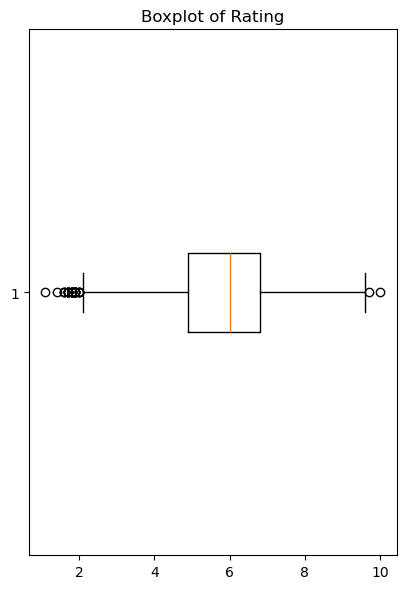

In [22]:
#Boxplots
plt.figure(figsize=(8, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [23]:
# Checking categorical columns and examining data types 
categorical_columns = dataset.select_dtypes(include=[object]).columns 
categorical_columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [24]:
# Show data types and first elements of categorical columns 
for column in categorical_columns:  
    print(f"Colonne: {column}, Type: {dataset[column].apply(type).unique()}")

Colonne: Name, Type: [<class 'str'>]
Colonne: Year, Type: [<class 'str'>]
Colonne: Duration, Type: [<class 'str'>]
Colonne: Genre, Type: [<class 'list'>]
Colonne: Votes, Type: [<class 'str'>]
Colonne: Director, Type: [<class 'str'>]
Colonne: Actor 1, Type: [<class 'str'>]
Colonne: Actor 2, Type: [<class 'str'>]
Colonne: Actor 3, Type: [<class 'str'>]


In [25]:
for column in categorical_columns:  
    if dataset[column].apply(type).eq(list).any():  
        # Convert lists to strings joins  
        dataset[column] = dataset[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [26]:
# Show data types and first elements of categorical columns  
for column in categorical_columns:  
    print(f"Colonne: {column}, Type: {dataset[column].apply(type).unique()}")

Colonne: Name, Type: [<class 'str'>]
Colonne: Year, Type: [<class 'str'>]
Colonne: Duration, Type: [<class 'str'>]
Colonne: Genre, Type: [<class 'str'>]
Colonne: Votes, Type: [<class 'str'>]
Colonne: Director, Type: [<class 'str'>]
Colonne: Actor 1, Type: [<class 'str'>]
Colonne: Actor 2, Type: [<class 'str'>]
Colonne: Actor 3, Type: [<class 'str'>]


In [27]:
# Encode categorical features if they exist using map() and LabelEncoder()
from sklearn.preprocessing import LabelEncoder 
# Checking categorical columns 
categorical_columns = dataset.select_dtypes(include=[object]).columns  

# Initializing the LabelEncoder  
label_encoder = LabelEncoder()  

# Encoding categorical columns  
for column in categorical_columns:  
    dataset[column] = label_encoder.fit_transform(dataset[column])  

dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,98,9,299,7.0,1849,1926,2250,800,3108
1,1,98,9,299,7.0,1849,1548,3280,4790,527
2,2,100,172,351,4.4,1169,5123,3713,2866,3450
3,3,98,10,228,4.4,1169,3319,2917,1504,4020
4,7,89,5,299,4.7,1898,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,13832,67,29,0,4.6,368,2690,2586,4299,4262
15505,13834,78,29,40,4.5,1687,2499,227,4532,519
15506,13835,84,30,0,6.2,794,2424,3609,1589,490
15507,13836,67,30,0,6.2,794,2195,1139,1589,490


In [28]:
dataset.dtypes

Name          int32
Year          int32
Duration      int32
Genre         int32
Rating      float64
Votes         int32
Director      int32
Actor 1       int32
Actor 2       int32
Actor 3       int32
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'Feature-correlation (pearson)'}>

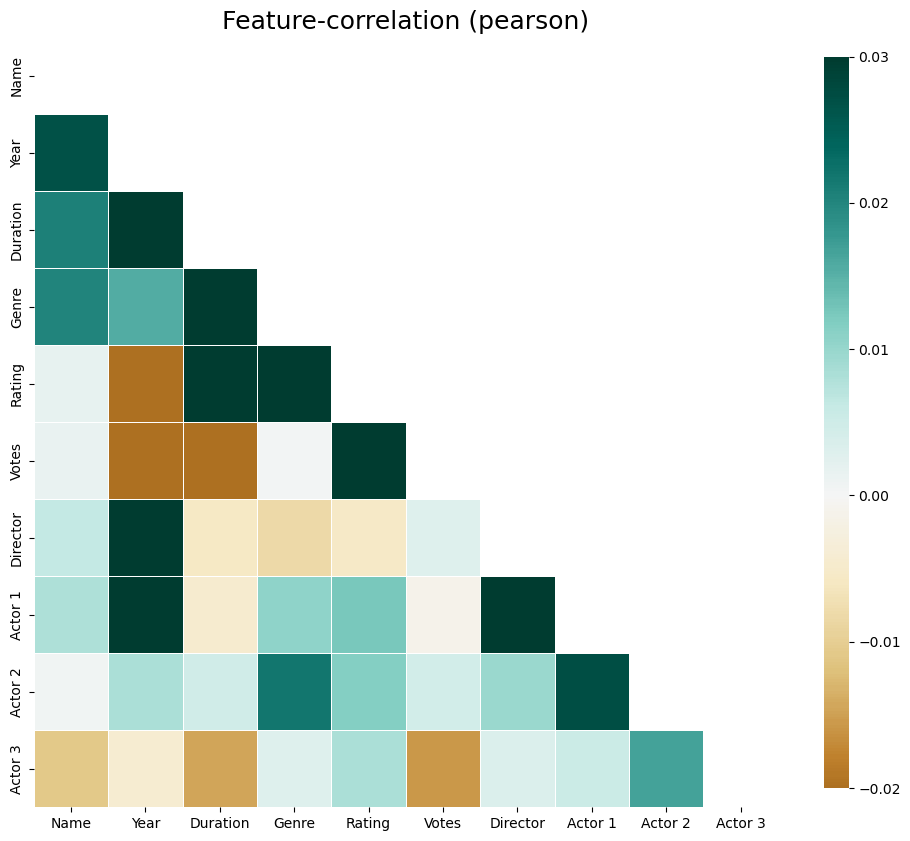

In [29]:
# Correlation heatmap using KLIB
klib.corr_plot(dataset)

In [30]:
# Select features (X) and target (y)
X = dataset.drop(columns=['Rating'])  
y = dataset['Rating']

In [31]:
X

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,98,9,299,1849,1926,2250,800,3108
1,1,98,9,299,1849,1548,3280,4790,527
2,2,100,172,351,1169,5123,3713,2866,3450
3,3,98,10,228,1169,3319,2917,1504,4020
4,7,89,5,299,1898,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...
15504,13832,67,29,0,368,2690,2586,4299,4262
15505,13834,78,29,40,1687,2499,227,4532,519
15506,13835,84,30,0,794,2424,3609,1589,490
15507,13836,67,30,0,794,2195,1139,1589,490


In [32]:
y

0        7.0
1        7.0
2        4.4
3        4.4
4        4.7
        ... 
15504    4.6
15505    4.5
15506    6.2
15507    6.2
15508    6.2
Name: Rating, Length: 15500, dtype: float64

In [33]:
# Diviser les données  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
7949,7077,97,4,181,835,1105,74,2491,315
8218,7321,97,163,299,1181,3445,3307,3892,745
4013,3563,15,71,191,1431,1139,3891,2437,1961
6925,6161,52,56,238,1849,161,4631,4675,4369
335,315,68,49,44,1515,665,3826,2440,1291
...,...,...,...,...,...,...,...,...,...
5195,4625,43,14,112,1522,133,3752,1607,2697
13427,11933,47,78,299,1900,2030,1432,873,361
5394,4788,70,60,313,1849,4315,814,800,334
860,767,100,26,479,180,4624,3352,2046,4272


In [35]:
X_test

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
14624,13036,93,14,248,1050,4238,3248,1163,3963
7753,6903,48,49,4,1210,2797,888,672,1376
11510,10270,95,20,238,470,3633,4658,4425,3196
7238,6448,79,153,479,536,317,3760,3026,952
10275,8724,99,69,409,286,1275,271,4668,3734
...,...,...,...,...,...,...,...,...,...
10765,9592,56,142,392,808,3708,8,3064,4058
10496,9366,65,45,87,1389,665,1579,2884,1156
2031,1774,73,62,299,1363,1059,3294,4709,434
5705,5063,20,37,20,1341,3723,3039,731,2097


In [36]:
y_train

7949     6.1
8218     6.6
4013     7.5
6925     6.0
335      4.1
        ... 
5195     7.4
13427    7.7
5394     5.4
860      3.8
7274     3.1
Name: Rating, Length: 12400, dtype: float64

In [37]:
y_test

14624    5.7
7753     5.9
11510    8.0
7238     7.4
10275    5.6
        ... 
10765    7.1
10496    6.5
2031     3.8
5705     5.0
5962     7.2
Name: Rating, Length: 3100, dtype: float64

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[5.65666578 5.72127582 5.62850258 ... 5.92451631 5.87743452 5.96034331]


In [ ]:
# Supposons que voici les colonnes d'X_train  
expected_columns = X_train.columns.tolist()  

# Créez un DataFrame en fonction de ces colonnes  
new_movie = pd.DataFrame({  
    'Genre_Drama': [1],          # Exemple : film de Drame  
    'Genre_Comedy': [0],         # Non comédie  
    'Genre_Musical': [0],        # Non musical  
    'Director_Gaurav Bakshi': [1],  # Réalisateur  
    'Director_Ovais Khan': [0],     # Non Ovais Khan  
    'Actor_1': [1],                   # Premier acteur ajusté  
    'Actor_2': [0],                   # Deuxième acteur ajusté  
    'Actor_3': [0],                   # Troisième acteur ajusté  
    'Duration': [120]                 # Autre colonne que vous avez utilisée  
    # Ajoutez d'autres colonnes si nécessaire en utilisant des valeurs de 0  
}).reindex(columns=expected_columns, fill_value=0)  # Remplir les colonnes manquantes avec des 0  

# Prédiction pour le nouveau film  
predicted_rating = regressor.predict(new_movie)  

print(f"La note prédit pour le nouveau film est : {predicted_rating[0]}")  

# The goal is to analyze historical movie data and develop a model </br>  that accurately estimates the rating given to a movie by user  orcritics.s.

In [46]:
# Random Forest Regressor  
rf_model = RandomForestRegressor()  
rf_model.fit(X_train, y_train) 

RandomForestRegressor()

In [49]:
# Predictions  
y_pred_lr = regressor.predict(X_test)  
y_pred_rf = rf_model.predict(X_test)  

# Calculate Mean Squared Error  
mse_lr = mean_squared_error(y_test, y_pred_lr)  
mse_rf = mean_squared_error(y_test, y_pred_rf)  

print(f'MSE of Linear Regression: {mse_lr}')  
print(f'MSE of Random Forest: {mse_rf}')  

MSE of Linear Regression: 1.7968284220840993
MSE of Random Forest: 1.5649927503225805


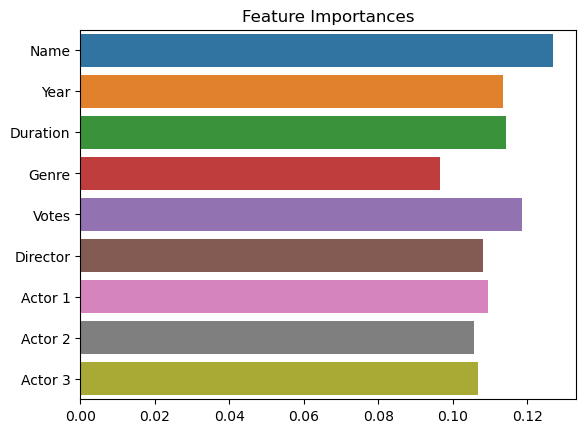

In [53]:
# Feature Importance for Random Forest  
importances = rf_model.feature_importances_  
sns.barplot(x=importances, y=X.columns)  
plt.title('Feature Importances')  
plt.show()

Movie Rating Prediction project enables you to explore data
 analysis,</br>  preprocessing, feature engineering, and machin 
 learning modeling techniques</br>. It provides insights into the factos
 that influence movie ratings and allows you to build a model that
 can estimate the ratings of movies accurately.

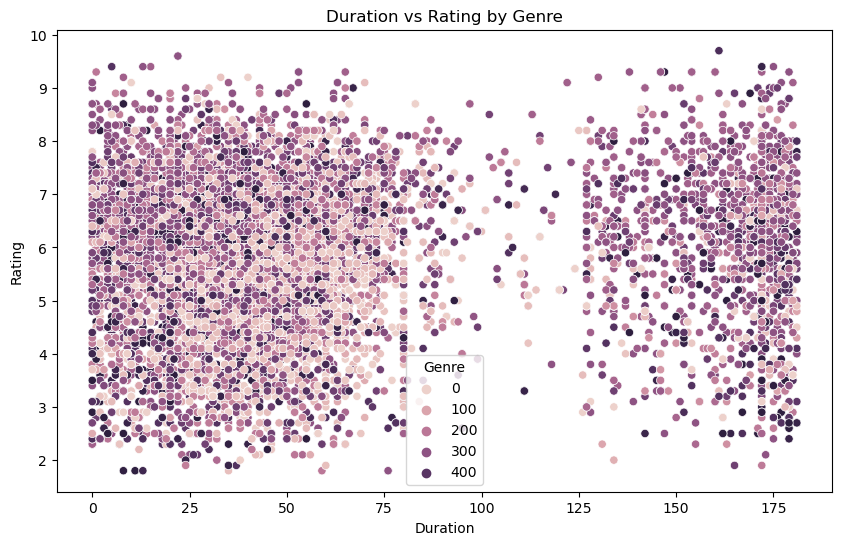

In [54]:
# Example code for visualization  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=dataset, x='Duration', y='Rating', hue='Genre')  
plt.title('Duration vs Rating by Genre')  
plt.show()  

In [56]:
print(dataset['Genre'].dtypes)  
print(dataset['Genre'].unique())  # Check for unique values to diagnose the issue 

int32
[299 351 228 197 366 262 418  38 409 421 199 479 191 193 192 245 423 163
 212   0 344 181  87 335 339 416 415 345  46  55 203 131  85 258 484 478
 169 419 238 361 110 227  29 261 422 248 360 368 321  18 234   7 365  40
 343  17  99 451  65 116 458  94 356 184 446 290 287 330 324 370 267   3
 460 196 214 426 447 388  86  52 453 392 374 313  20  54 346 354 232  80
  28  43 320  79  44  76 338 243 476 140 257  12 425  19 204 465 323 467
 448 386  45 377 246 438 348 357 104 242 383  74  83 474 347 244  35  14
 230 236  50  26 167  21 319   6 273  49 139 256 310 331 231 431 179  25
 336  33 122 112 126   5   1 183 240 117 406 333 441 296 454 379 407 435
 108 450 307 172 180 170 367 325 224 316  90 146  34  36 142  53 211 286
 309   4 272 219 166 136 173  23 455  10 253  88  98 213 120 391 301 372
  41 123 398 202 326 433  47 165  48 111 363 221 102 239 481 264 303 105
 274 249 269  67 113 156 216 318 162 171 424 375 135 381 288 358 208  30
 353  89 317  57  11 412 182 137 305 158 189 

In [57]:
# Convert the 'Genre' column to strings  
dataset['Genre'] = dataset['Genre'].astype(str) 

In [58]:
# Example: Create a binary variable for 'Drama' genre  
dataset['is_Drama'] = dataset['Genre'].apply(lambda x: 1 if 'Drama' in x else 0)  

In [59]:
# Fit Random Forest model  
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)  
y_pred_rf = rf_model.predict(X_test)  

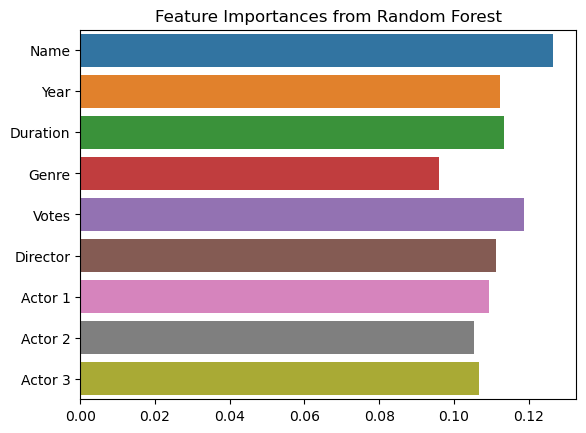

In [61]:
# Example: Visualize feature importance  
importances = rf_model.feature_importances_  
feature_names = X.columns  
sns.barplot(x=importances, y=feature_names)  
plt.title('Feature Importances from Random Forest')  
plt.show()  